## Analyst Excercise Jaybird Studios & Lagree West

#### Oliver Gullery | August 2nd, 2024

Brief Python Exploratory Analysis of Order Detail Worksheet

*Notable Libraries Used:*
- Pandas
- NumPy
- Matplotlib
- OpenPyXL



In [9]:
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

## A. Reading the Excel File and Converting Order Detail Worksheet to a csv

In [13]:
excel_file = 'Analyst Exercise Data Set.xlsx'
workbook = openpyxl.load_workbook(excel_file)

# Select the sheet named "Order Detail"
sheet_name = 'Order Detail'
if sheet_name in workbook.sheetnames:
    sheet = workbook[sheet_name]
else:
    raise ValueError(f"Sheet '{sheet_name}' not found in the workbook.")

# Create a CSV file
csv_file = 'order_detail.csv'
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write the rows from the Excel sheet to the CSV file
    for row in sheet.iter_rows(values_only=True):
        writer.writerow(row)

print(f"Sheet '{sheet_name}' from Excel file '{excel_file}' has been converted to CSV file '{csv_file}'.")

Sheet 'Order Detail' from Excel file 'Analyst Exercise Data Set.xlsx' has been converted to CSV file 'order_detail.csv'.


## B. Reading the Data

In [38]:
data = pd.read_csv("order_detail.csv")
data.head()

,Order Number,Order Status,Order Date (UTC),Order Time (UTC),Order Device,Processed by System?,Customer ID,Broker ID,Product,Product ID,...,Line Subtotal,Original Price,Line Tax,Line Total,Order Payment Method(s),Purchase Location,Fulfillment Location,Fulfillment Region,Unnamed: 28,Unnamed: 29
0,GCRM-AT7M-559H,Completed,2024-01-01 00:00:00,1900-01-01 15:07:00,desktop,False,54654.0,54654.0,TNA x Jaybird Cozy Fleece Boyfriend Hold Space...,15159.0,...,0.0,105.0,0.00,0.00,No Charge,In-Store,Yorkville,Toronto,NaN,=sum(X2:X9254)
1,Y49A-P5DM-559H,Completed,2024-01-01 00:00:00,1900-01-01 15:29:00,desktop,False,82872.0,53590.0,Bottled Water- Toronto,14825.0,...,2.5,2.5,0.33,2.83,Mastercard,In-Store,Queen West,Toronto,NaN,NaN
2,SYHS-AZC9-559H,Completed,2024-01-01 00:00:00,1900-01-01 18:18:00,desktop,False,71125.0,80976.0,Bottled Water- Vancouver,14819.0,...,2.5,2.5,0.13,2.63,Visa,In-Store,Yaletown,Vancouver,NaN,=sum(V2:V9254)
3,HEYQ-7JPM-559H,Completed,2024-01-01 00:00:00,1900-01-01 19:48:00,desktop,False,35019.0,80976.0,Bottled Water- Vancouver,14819.0,...,2.5,2.5,0.13,2.63,Visa,In-Store,Yaletown,Vancouver,NaN,NaN
4,WAZY-9VGT-559H,Completed,2024-01-01 00:00:00,1900-01-01 19:59:00,desktop,False,37182.0,80976.0,Bottled Water- Vancouver,14819.0,...,2.5,2.5,0.13,2.63,Visa,In-Store,Yaletown,Vancouver,NaN,NaN


## C. Exploratory Data Analysis

Some brief EDA to search for null values & understand data
- Look at size of data
- Search for null values


In [39]:
# looking at the columns
data.columns

Index(['Order Number', 'Order Status', 'Order Date (UTC)', 'Order Time (UTC)',
       'Order Device', 'Processed by System?', 'Customer ID', 'Broker ID',
       'Product', 'Product ID', 'Variant ID', 'Product Barcode', 'Product SKU',
       'Product Color', 'Product Size', 'Product Type', 'Line Status',
       'Transaction Date', 'Currency', 'Line Quantity', 'Line Subtotal',
       'Original Price', 'Line Tax', 'Line Total', 'Order Payment Method(s)',
       'Purchase Location', 'Fulfillment Location', 'Fulfillment Region',
       'Unnamed: 28', 'Unnamed: 29'],
      dtype='object')

In [40]:
# looking at the size of the data
data.shape

(9255, 30)

In [41]:
# summary info about the data
data.info

<bound method DataFrame.info of         Order Number Order Status     Order Date (UTC)     Order Time (UTC)  \
0     GCRM-AT7M-559H    Completed  2024-01-01 00:00:00  1900-01-01 15:07:00   
1     Y49A-P5DM-559H    Completed  2024-01-01 00:00:00  1900-01-01 15:29:00   
2     SYHS-AZC9-559H    Completed  2024-01-01 00:00:00  1900-01-01 18:18:00   
3     HEYQ-7JPM-559H    Completed  2024-01-01 00:00:00  1900-01-01 19:48:00   
4     WAZY-9VGT-559H    Completed  2024-01-01 00:00:00  1900-01-01 19:59:00   
...              ...          ...                  ...                  ...   
9250  ZWYZ-RN9B-55NR    Completed  2024-06-15 00:00:00  1900-01-01 20:25:00   
9251  F2K9-XBXQ-55NR    Completed  2024-06-15 00:00:00  1900-01-01 20:32:00   
9252  D8CR-BGXW-55NR    Completed  2024-06-15 00:00:00  1900-01-01 23:23:00   
9253             NaN          NaN                  NaN                  NaN   
9254             NaN          NaN                  NaN                  NaN   

     Order Device P

In [47]:
# looking for null values
data.isnull().sum()

Order Number                  2
Order Status                  2
Order Date (UTC)              2
Order Time (UTC)             19
Order Device               2007
Processed by System?          2
Customer ID                  17
Broker ID                     2
Product                       2
Product ID                    2
Variant ID                    2
Product Barcode               2
Product SKU                   2
Product Color              3718
Product Size               3856
Product Type                  2
Line Status                   2
Transaction Date              2
Currency                      2
Line Quantity                 2
Line Subtotal                 2
Original Price                2
Line Tax                      2
Line Total                    2
Order Payment Method(s)       2
Purchase Location             2
Fulfillment Location          2
Fulfillment Region            2
Unnamed: 28                9255
Unnamed: 29                9253
dtype: int64

## D. Plotting Weekly Sales

In [36]:
data = pd.read_csv("order_detail.csv")
data['Order Date (UTC)'] = pd.to_datetime(data['Order Date (UTC)'])

data.set_index('Order Date (UTC)', inplace = True)

weekly_data = data['Original Price'].resample('W').sum()

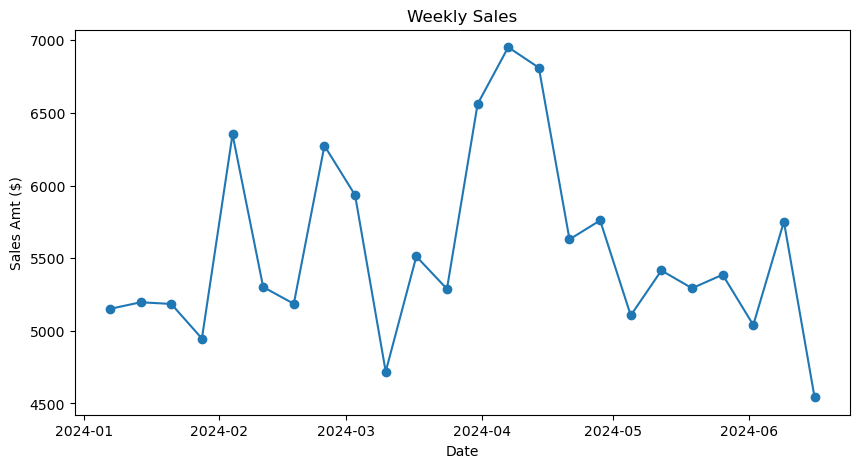

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(weekly_data.index, weekly_data.values, marker='o')


plt.title('Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales Amt ($)')


plt.show()